**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import Problem1
from scipy.optimize import minimize
from ipywidgets import interact, Checkbox, fixed, widgets
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

To check the market clearing conditions we must calculate the optimal firm and consumer behavior given the prices and other parameters. Then we are able to compare these results to check the market clearing conditions.

<u>Firm behavior</u>: \
We use the given functions for optimal firm behavior to calculate for each good the labor demand, $l_1^*$ and $l_2^*, and production ,$y_1^*$ and $y_2^* given the prices and parameters values. We simply plug-in the numbers and do not re-arrange further.

<u>Consumer behavior</u>: \
For consumers we cannot just plug into the functions, because their supply of labor, $l^*$, is dependent on their consumption, c_1^* and c_2^*. Thus, we create a function to optimize the consumers utility given the prices to find labor supply and consumption conditional on the firms behavior according to their optimal functions.

<u>Market clearing conditions</u>: \
We are now able to check the market clearing condition 1-3 by comparing firm and consumer behaviors. 

For condition 1 it we have a 10 x 10 = 100 different combinations of prices to compare. For condition 2 + 3, we only have 10 different prices to compare, because $p_2$ does not affect the good 1 market and vice-versa.

To make it easier to analyze, we plot the results.

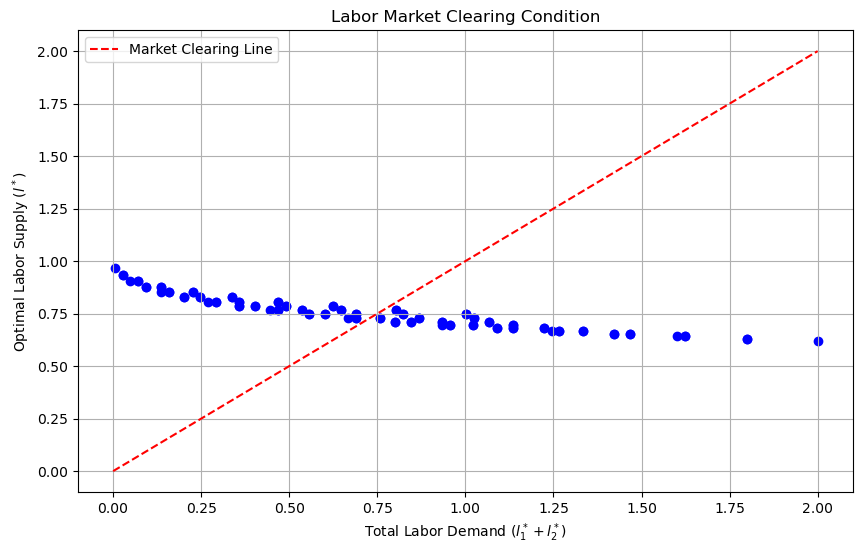

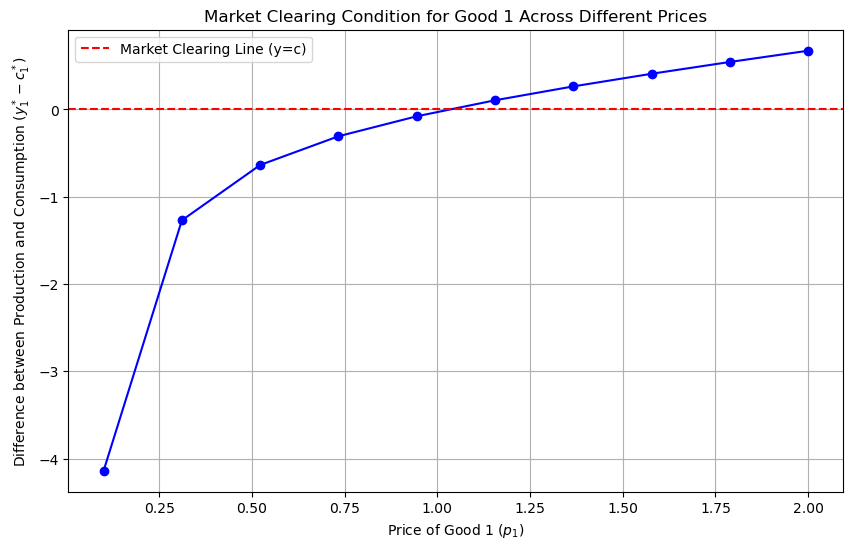

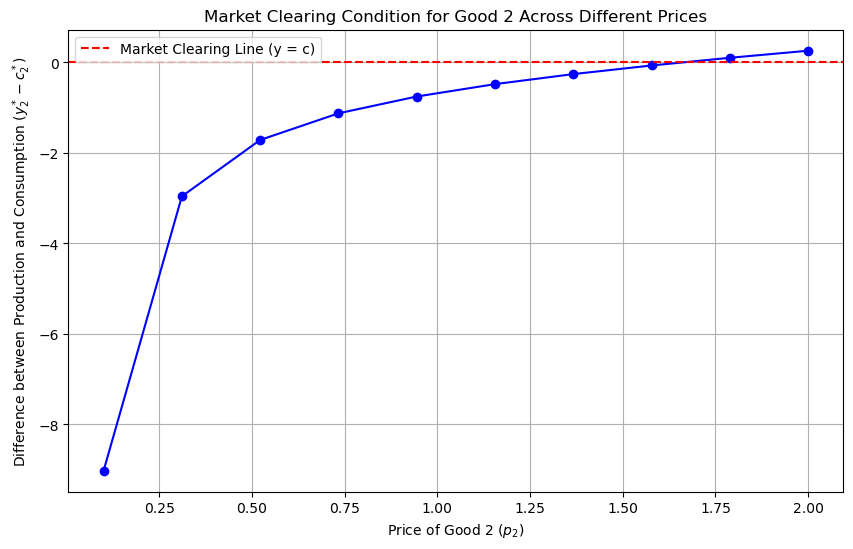

In [2]:
from Problem1 import ProductionEconomy

# Instantiate the class
PE = ProductionEconomy()

# Define the range of prices for p1 and p2
p1 = np.linspace(0.1, 2, 10)
p2 = np.linspace(0.1, 2, 10)

# Plot the labor market clearing condition
PE.plot_labor_market_clearing(p1, p2)
PE.plot_good1_market_clearing()
PE.plot_good2_market_clearing()

<u>Labor market clearing conditions</u>: \
For the labor market to clear, we must have a point on the 45 degree line, where each side of the equality are the same in condition 1. We observe that the labor market does not clear for any of the price combinations. However, it is close to clearing for some combinations of prices.

<u>Good market 1</u>: \
We again observe that good market 1 does not clear for any price combinations. However, we see indications that the market clearing price will be approx. 1.1, as it is where we cross the market clearing line.

<u>Good market 2</u>: \
We again observe that good market 2 does not clear for any price combinations. However, we see indications that the market clearing price will be approx. 1.7, as it is where we cross the market clearing line.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

To find the equilibrium prices $p_1$ and $p_2$ we must find the prices that satisfy the market clearing conditions 1-3. We find them in a few steps:
1. We re-use many of the methods from previos questions and create a system of equations to check for market clearing
2. We use a numerical method to solve for the market clearing conditions. In particular we use a 'scipy.optimize'.
3. We apply Walras' law and only use market clearing conditions 2+3 to find the equilibrium prices.

The results are:

In [3]:
# Calculate the equilibrium prices
equilibrium_prices = PE.market_clearing_prices()

# Assuming equilibrium_prices returns an array where the first element is the price for Good 1 and the second is for Good 2
price_good1, price_good2 = equilibrium_prices

# Print the results with descriptions
print(f"Equilibrium Price for Good 1: {price_good1:.5f}")
print(f"Equilibrium Price for Good 2: {price_good2:.5f}")

Equilibrium Price for Good 1: 1.12529
Equilibrium Price for Good 2: 1.71890


Hence, we have found the equilibrium prices to be 1.3 for good 1 and 1.7 for good 2. We can check if the prices are correct by calculating market clearing conditions 2+3:

In [4]:
# Calculate and check market conditions
PE.calculate_market_conditions(price_good1, price_good2)

Market Conditions at p1 = 1.13, p2 = 1.72:
  Production of Good 1: 0.56
  Consumption of Good 1: 0.56
  -> Market 1 clears
  Production of Good 2: 0.86
  Consumption of Good 2: 0.86
  -> Market 2 clears


Hence, we can now conclude our results are correct as the market clears.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

We find the values of $\tau$ and $T$ to maximize SWF in steps. 
1. We plot the SWF for different values of $\tau$ to get a visual interpretation
2. We use numerical optimization to find the optimal value of $\tau$
3. We check if the market clears for these new values of $\tau$.

First, we plot the SWF for $\tau$ in $np.linspace(0.0, 1, 30)$ to get a overview.

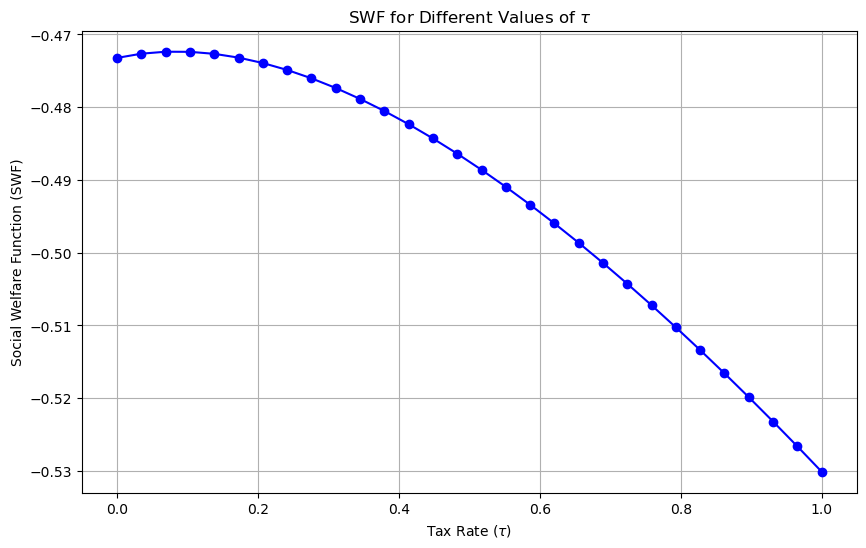

In [5]:
# plotting the SWF for different values of tau
tau_values = np.linspace(0.0, 1, 30)  # Define a range of tau values
PE.plot_swf_for_different_taus(tau_values, kappa=0.1)

From the plot it looks like that the SWF function at first increases for increases with $\tau$. However, when we reach 0.3 and probably even before the SWF starts declining rapidly as the tax rate increases. Hence, we have strong indications that the optimal tax rate is within the interval $[0.0, 0.3]. 

We exploit our knowledge on the interval to calculate the optimal tax rate. Specifically, we apply numerical optimization, where we iterate over the interval $[0.0, 0.3]$:

In [6]:
# Define the bounds for tau
tau_bounds = (0.0, 0.3)

# Call the new method to get the results
results = PE.calculate_optimal_tau_and_market_conditions(kappa=0.1, tau_bounds=tau_bounds)

# Print the results
print(f"Optimal tau: {results['optimal_tau']:.2f}")
print(f"Lump-sum transfer T: {results['lump_sum_transfer']:.2f}")
print(f"Optimal SWF: {results['optimal_swf']:.3f}")
print(f"Equilibrium Prices: p1 = {results['equilibrium_prices'][0]:.2f}, p2 = {results['equilibrium_prices'][1]:.2f}")
print(f"Consumptions: c1 = {results['consumptions'][0]:.2f}, c2 = {results['consumptions'][1]:.2f}")
print(f"Productions: y1 = {results['productions'][0]:.2f}, y2 = {results['productions'][1]:.2f}")

Optimal tau: 0.08
Lump-sum transfer T: 0.07
Optimal SWF: -0.472
Equilibrium Prices: p1 = 1.14, p2 = 1.71
Consumptions: c1 = 0.57, c2 = 0.85
Productions: y1 = 0.57, y2 = 0.85


Our results indicate the optimal tax rate $\tau$ to be 0.08, while the corresponding lump-sum transfer T is 0.07. It results in a SWF of -0.472, which is in line with the visuals in the above plot.

We have furthermore calculated c1, c2, y1, and y2 to compare if the market clearing conditions 2+3 are satisfied. We see that the conditions are satisfied. Hence, we conclude the market to clear and have strong indications our results are correct. The optimal tax rate is $\tau=0.08$.

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [ ]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [ ]:
# write your answer here

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [ ]:
# Write your answer here 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [ ]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

To answer this question, we simply plot in the respective values of x and y into the definition of A, B, C and D. We do it in steps:
1. First we create a set of empty points to store the variables and minimum distances to in the end find the min. value
2. We iterate over all points in X using the Euclidian distance (as defined in the exam question) for A, B, C and D until we find the point with satisfied conditions
3. We save the smallest value as variables A, B, C and D
4. We know display the results in an interactive plot

In [ ]:
import numpy as np
from Problem3 import find_points, interactive_plot

# Find points A, B, C, D
A, B, C, D = find_points(X, y)

# Call the interactive plot function
interactive_plot(X, y, A, B, C, D)

From the plot it looks like that $y$ is located within the triangle ABC. However, to make a final conclusion further analyses are required.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

To answer the question we compute the barycentric coordinates of the point $y$ with respect to the triangles ABC and CDA. Then we can determine which triangle $y$ is located inside. We do it in steps:
1. Compute the baycentric coordinates with the given formulas
2. Check of the baycentric coordinates satisfy the condition to be within the triangles ABC and CDA

In [ ]:
# importing some additional functions
from Problem3 import check_point_in_triangles

# Check if y is inside triangles ABC or CDA and compute barycentric coordinates
(inside_ABC, bary_coords_ABC), (inside_CDA, bary_coords_CDA) = check_point_in_triangles(A, B, C, D, y)

# Output the results
print(f"Point y is inside triangle ABC: {inside_ABC}")
print(f"Barycentric coordinates with respect to ABC: r1={bary_coords_ABC[0]}, r2={bary_coords_ABC[1]}, r3={bary_coords_ABC[2]}")

print(f"Point y is inside triangle CDA: {inside_CDA}")
print(f"Barycentric coordinates with respect to CDA: r1={bary_coords_CDA[0]}, r2={bary_coords_CDA[1]}, r3={bary_coords_CDA[2]}")

We observe that the baycentric coordinates are all within the range $[0,1]$ for the triangle ABC, while it is not true for the triangle CDA. Hence, we can conclude that the point $y$ is located inside triangle ABC as also indicated by our analysis in question 3.1.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

We apply the full algorithm, where we have already performed some of the steps:
1. We have already computed A, B, C and D in question 3.1
2. We have determined $y$ to be inside the triangle ABC and not CDA. Hence, we use the approach from the algorithm step 2. However, we apply a more general alogrithm that can also be used for other coordinates/values that potential lie within BCD also.

In [ ]:
# importing some additional functions
from Problem3 import compute_approximation_and_true_value

# Compute the approximation and true value of f(y) and the absolute error using the additional functions
f_y_true, f_y_approx, abs_error = compute_approximation_and_true_value(f, X, y, A, B, C, D, inside_ABC, bary_coords_ABC, inside_CDA, bary_coords_CDA)

We observe the approximated value to be very close to the true value. There is only an absolute error of 0.0003. It indicates the method to be very accurate.

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

To answer question 4 we take advantage of our already existing code and extend it a bit by adding extra functionality to it. We add an additional function following the algorithm and using our existing code:
1. Iterate over each poin$t $y$ in Y
2. For each point it finds the corresponding points A, B, C and D
3. Check if the points are inside the corresponding triangles ABC and BCD
4. We compute the approximation and true value using respectively baycentric approximation and the defined function
5. We store and plot the results for further analysis

Note: We also add functionality to the function such that it does not stop if e.g., the point does not fit inside the tiangle or A, B, C or D cannot be found. Specifically, we tell it to skip such points. 

In [ ]:
from Problem3 import plot_and_compute_results

# Call the function and get results
results = plot_and_compute_results(X, Y, f)

# Display results summary
print("\nResults Summary:\n")
for y, status, f_y_true, f_y_approx, abs_error in results:
    print(f"Point {y}:")
    if status.startswith("Skipped"):
        print(f"  Status: {status}")
    else:
        print(f"  Status: {status}")
        print(f"  True value of f({y[0]:.2f}, {y[1]:.2f}): {f_y_true:.2f}")
        print(f"  Approximated value of f({y[0]:.2f}, {y[1]:.2f}): {f_y_approx:.2f}")
        print(f"  Absolute error between the approximated and true value: {abs_error:.2f}")
    print("\n")

We observe that it is only the point $y = (0.5, 0.5)$ that we are able to locate using the baycentric approximation. For the other points either the points are outside triangles ABC and CDA or one of the points A, B, C and D cannot be found. This is illustrated both in text and visually in the plot. Hence, we have indications that the method is not as sufficient as first indicated by our intitial values of y.

The issue of the method being inefficient can arise due to the distribution and density of random points in X. Specifically, the density of points in X in the upper right corner is very sparse (See the plot). Hence, e.g., for y = (0.8,0.8) it is hard to triangulate because of lack of data-points to triangulate with. Possible solutions could be:
1. Increase the number of points in X from 50 to maybe 1,000. 
2. Change the distribution that the points X are drawn from
3. We could also try and calculate other triangles.